<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/deeplearningstudy/blob/main/07_%EA%B8%B0%EB%B3%B8%EC%B0%A8%ED%8A%B8%EC%98%88%EC%A0%9C_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

패키지 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kdt_2506/data/trade_apt_api_2023.txt', sep='\t')
df.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,층
0,202306,서울시 종로구,11110,사직동,광화문스페이스본(101동~105동),"138,000",2023,6,9,2008,95.880,9
1,202306,서울시 종로구,11110,사직동,광화문스페이스본(101동~105동),"170,000",2023,6,10,2008,146.920,8
2,202306,서울시 종로구,11110,사직동,사직아파트,"84,000",2023,6,12,1970,116.230,6
3,202306,서울시 종로구,11110,당주동,롯데미도파광화문빌딩,"93,000",2023,6,20,1981,149.950,9
4,202306,서울시 종로구,11110,신문로2가,디팰리스,"408,000",2023,6,24,2020,148.111,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2304 non-null   int64  
 1   지역명     2304 non-null   object 
 2   지역코드    2304 non-null   int64  
 3   법정동     2304 non-null   object 
 4   아파트     2304 non-null   object 
 5   거래금액    2304 non-null   object 
 6   년       2304 non-null   int64  
 7   월       2304 non-null   int64  
 8   일       2304 non-null   int64  
 9   건축년도    2304 non-null   int64  
 10  전용면적    2304 non-null   float64
 11  층       2304 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 216.1+ KB


In [ ]:
df['거래금액'] = df['거래금액'].str.replace(' ', '').str.replace(',', '').astype(int)

In [ ]:
df['거래금액']

,거래금액
0,138000
1,170000
2,84000
3,93000
4,408000
...,...
2299,50000
2300,220000
2301,37400
2302,281000


In [ ]:
a = df[df['법정동'] == '사직동']

In [ ]:
a

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,층


In [ ]:
df['법정동']

,법정동
0,사직동
1,사직동
2,사직동
3,당주동
4,신문로2가
...,...
2299,도곡동
2300,도곡동
2301,도곡동
2302,도곡동


In [ ]:
data = df.groupby('기준년월')['거래금액'].mean()

In [ ]:
data

,거래금액
기준년월,
202201,178784.907895
202202,176651.564706
202203,197273.245614
202204,232832.446043
202205,208996.691176
202206,213556.690476
202207,196403.571429
202208,94087.318584
202209,142999.937500


In [ ]:
data.index

Index([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209,
       202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306],
      dtype='int64', name='기준년월')

In [ ]:
index = data.index

In [ ]:
index

Index([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209,
       202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306],
      dtype='int64', name='기준년월')

In [ ]:
index.shape

(18,)

In [ ]:
index

Index([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209,
       202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306],
      dtype='int64', name='기준년월')

In [ ]:
len(data.index)

18

In [ ]:
np.arange(len(data.index))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [ ]:
# df = df.sort_index()

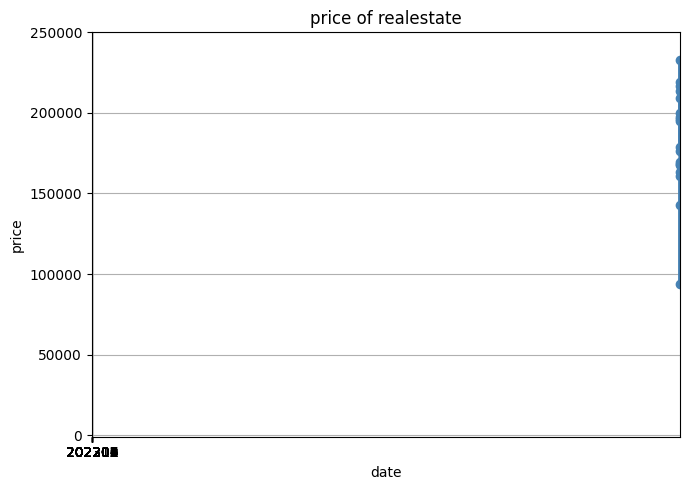

In [ ]:

# # 데이터프레임 생성 및 문자열 인덱스 설정
# df = pd.DataFrame(data)
# df.set_index('기준년월', inplace=True)

# # 인덱스 정렬 (문자열이므로 사전순 정렬 필요)
# df = df.sort_index()

# 그래프 그리기
plt.figure(figsize=(7, 5))
plt.plot(data.index, data, marker='o', linestyle='-', color='steelblue')
plt.xticks(np.arange(len(data.index)), labels = data.index)
plt.title('price of realestate')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.tight_layout()
plt.ylim(-1000,250000)
plt.show()

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data = data.sort_index()


In [ ]:
data.index

Index([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209,
       202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306],
      dtype='int64', name='기준년월')

In [ ]:
data

,거래금액
기준년월,
202201,178784.907895
202202,176651.564706
202203,197273.245614
202204,232832.446043
202205,208996.691176
202206,213556.690476
202207,196403.571429
202208,94087.318584
202209,142999.937500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 202201 to 202306
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   거래금액    18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


In [ ]:
data['거래금액'] = data['거래금액'].astype(int)

In [ ]:
# data = data.set_index('기준년월')

In [ ]:
data.index

Index([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209,
       202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306],
      dtype='int64', name='기준년월')

1. 기본차트 그려보기

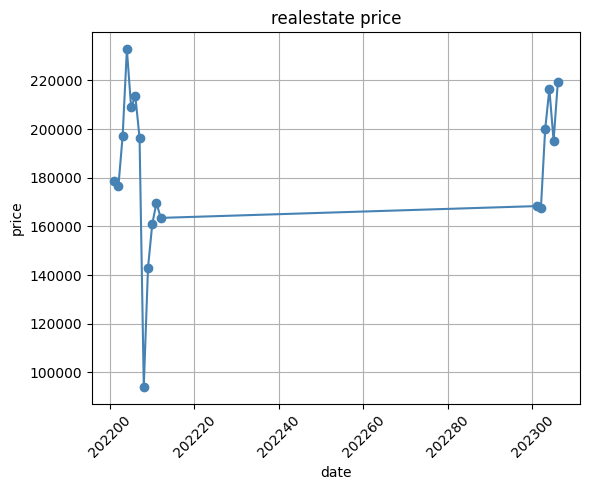

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(data, marker='o', linestyle='-', color='steelblue')

# x축 날짜 전체 표시
plt.xticks(rotation=45)

# 제목, 축 라벨, 기타
plt.title('realestate price')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.tight_layout()
plt.show()

2. 데이터 추가하기

<ipython-input-9-7a44a32ba82e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('기준년월').mean()['거래금액']


기준년월
202201    178784.907895
202202    176651.564706
202203    197273.245614
202204    232832.446043
202205    208996.691176
202206    213556.690476
202207    196403.571429
202208     94087.318584
202209    142999.937500
202210    160898.142857
202211    203631.578947
202212    163493.877551
202301    168342.123894
202302    167463.177570
202303    199844.976303
202304    216480.601852
202305    195190.343643
202306    217566.666667
Name: 거래금액, dtype: float64

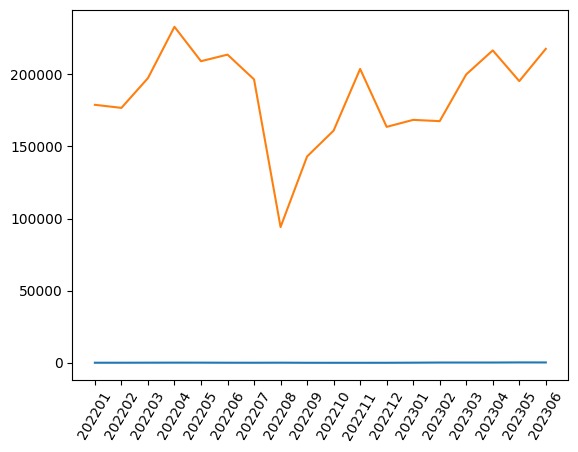

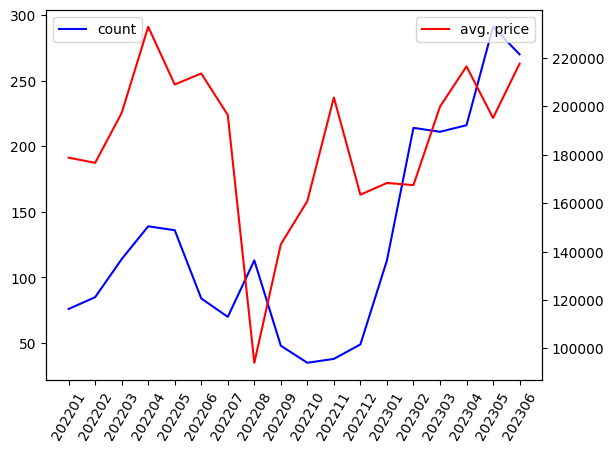

In [ ]:
ax2 = ax1.twinx()

차트 요소 정리

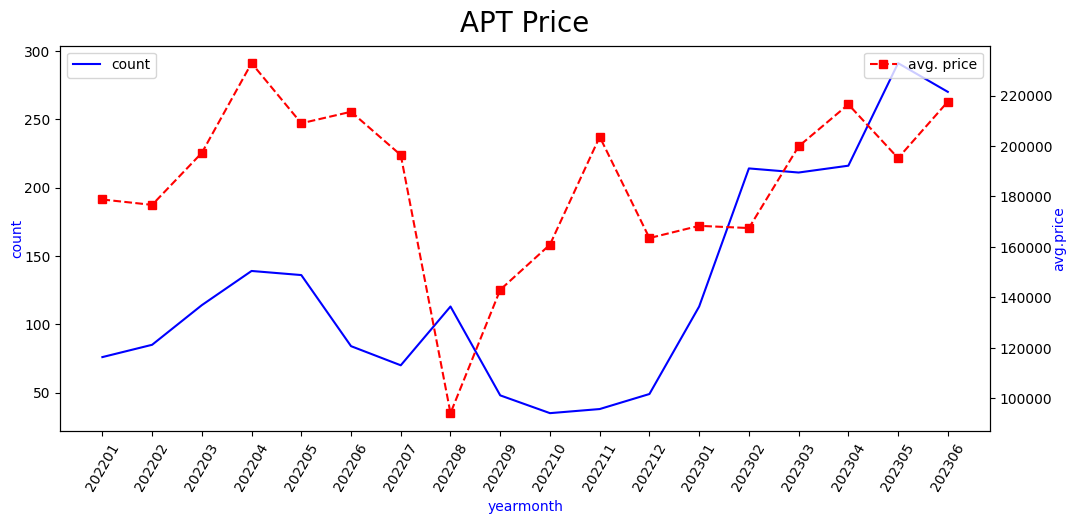